In [1]:
%matplotlib inline 

# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code and some require graphical results. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**STEP1:** Load the data set from the csv file (SeoulBikeData.csv) into a DataFrame, and summarise it with at least two appropriate pandas functions
Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [3]:
data = pd.read_csv('SeoulBikeData.csv')
data.info()
data.describe()

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step1_data
step1_data = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<!-- BEGIN QUESTION -->

**STEP2:** To get a feeling for the data it is a good idea to do some form of simple visualisation. Display a set of histograms for the features as they are right now, prior to any cleaning steps.

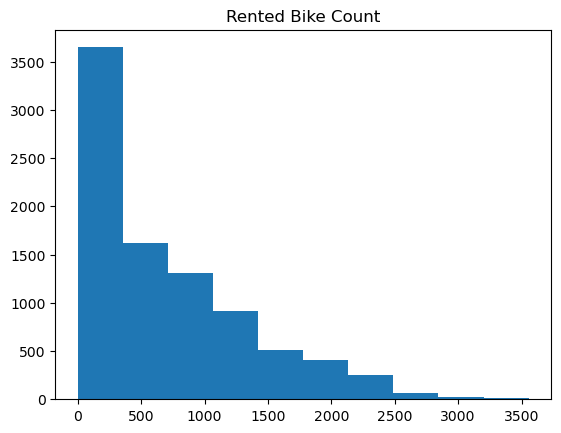

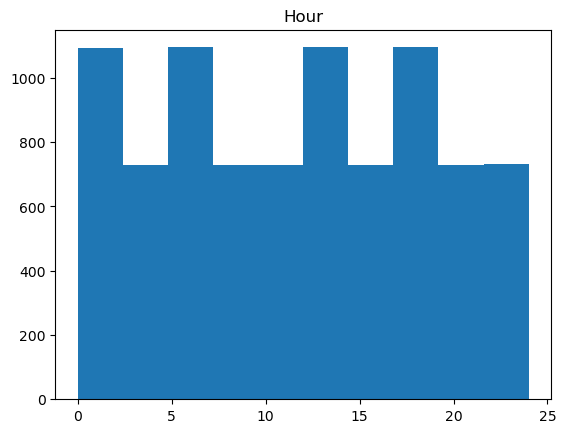

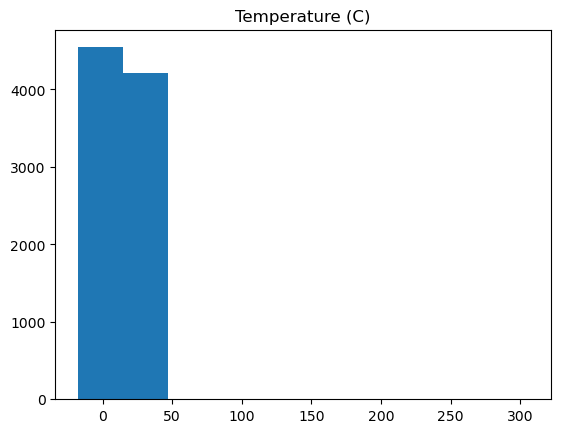

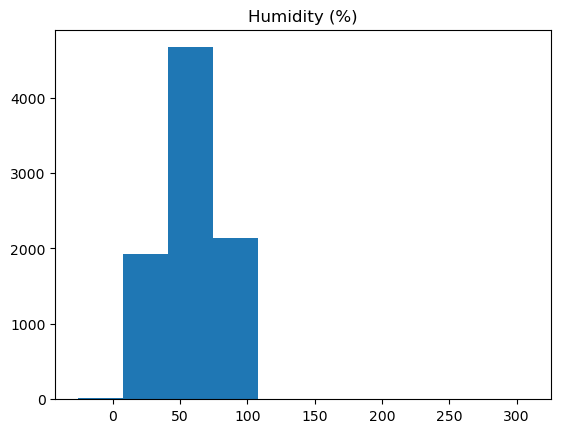

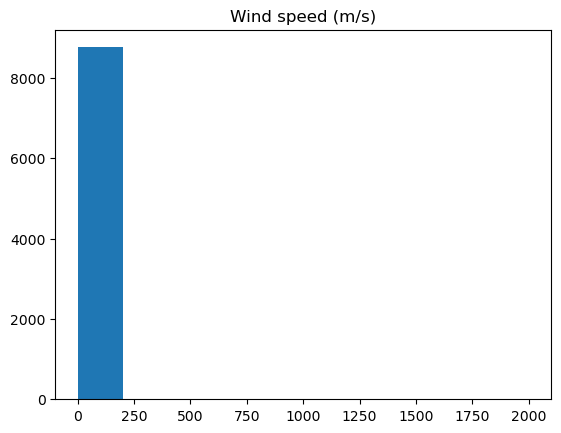

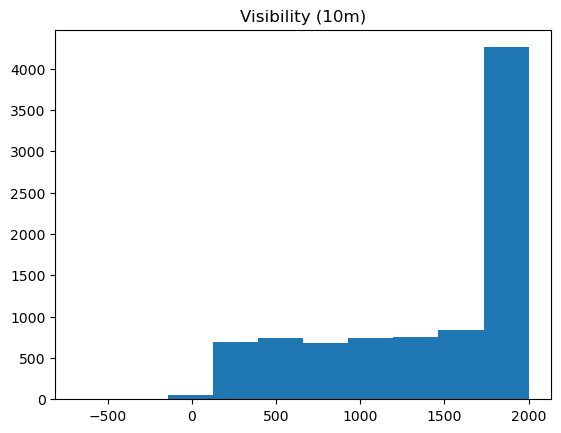

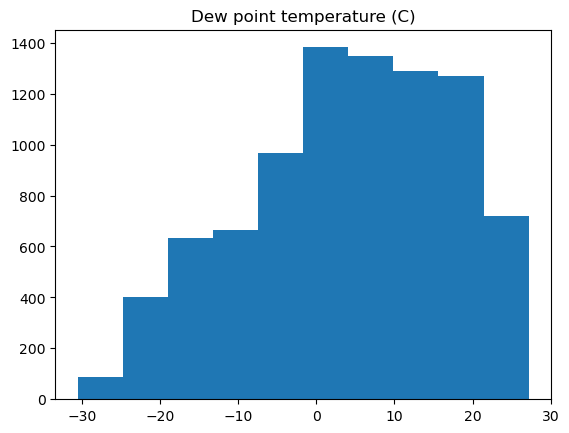

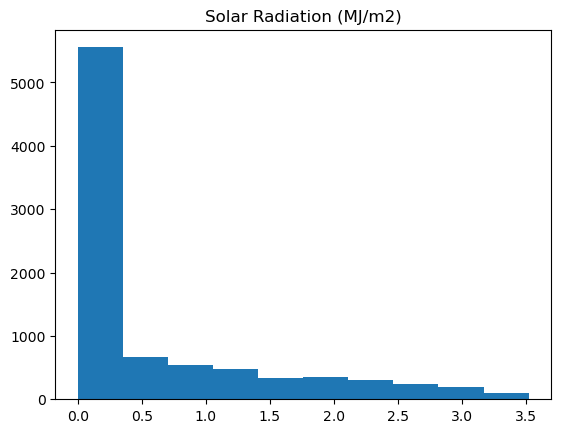

In [4]:
# Plot multiple variables
for col in data.columns:
    if data[col].dtype == 'O': continue
    plt.hist(data[col])
    plt.title(col)
    plt.show()

<!-- END QUESTION -->

**STEP3:** The "Functioning Day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so remove rows from the DataFrame where the business is closed. After doing this, delete the Functioning Day feature from the DataFrame and verify that this worked.

In [5]:
data = data[data['Functioning Day'] == 'Yes']
data.drop('Functioning Day',axis = 1, inplace = True)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step3_data = data.copy()

The goal is to predict bike rental demand using historical data. To achieve this, you will use regression techniques with "Bike Rental Count" as the target feature for this prediction, *but for this*, it is important that all other features in the data are numerical. 

**STEP4:** Two of the features in the data, "Holiday" and "Season", need to be converted to numerical format. Write code to convert the "Holiday" feature to 0 or 1 from its current format. For the "Season" feature, a better solution would be to add 4 new columns, labeled as "Winter", "Spring", "Summer", and "Autumn". Each of these columns should store a 0 or 1, depending on the corresponding season in each row.

In [6]:
# Convert Holiday feature
data['Holiday'] = data['Holiday'].replace({'No Holiday': 0, 'Holiday': 1})

# Convert Seasons feature
season_dummies = pd.get_dummies(data['Seasons'])
data = pd.concat([data, season_dummies], axis=1)
data.drop('Seasons', axis=1, inplace=True)

step4_data = data.copy()

**STEP5** It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [7]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
data['Weekday'] = data['Date'].transform(date_is_weekday)
data.drop('Date', axis=1, inplace=True)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step5_data
step5_data = data.copy()

**STEP6** Convert all the remaining data to numerical format, with any non-numerical entries set to NaN.

In [8]:
data['Rainfall(mm)'] =  pd.to_numeric(data['Rainfall(mm)'],errors = 'coerce')
data['Snowfall (cm)'] =  pd.to_numeric(data['Snowfall (cm)'],errors = 'coerce')

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step6_data
step6_data = data.copy()

**STEP7** Use graphical methods to display your data and identify problematic entries. Set any problematic values in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [9]:
# Set any problematic values 
data.loc[data['Temperature (C)'] > 50, 'Temperature (C)'] = np.nan
data.loc[data['Humidity (%)'] < 0, 'Humidity (%)'] = np.nan
data.loc[data['Humidity (%)'] > 100, 'Humidity (%)'] = np.nan
data.loc[data['Solar Radiation (MJ/m2)'] > 2.5, 'Solar Radiation (MJ/m2)'] = np.nan

# keep the variable name pipeline_step7 as you will use it in STEP9
pipeline_step7 = Pipeline([('imputer', SimpleImputer(strategy='median'))])

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step7_data
step7_data = data.copy()

**STEP8:** Generate a pre-processed version of the entire dataset by applying the pipeline defined in STEP7. Then, create separate scatter plots for each feature against the target variable "Bike Rental Count" to visualize the strength of the relationship. Additionally, calculate the correlation of each feature with the target using either the pandas function corr() or numpy corrcoef() and find the 3 attributes that are the most correlated with bike rentals. 

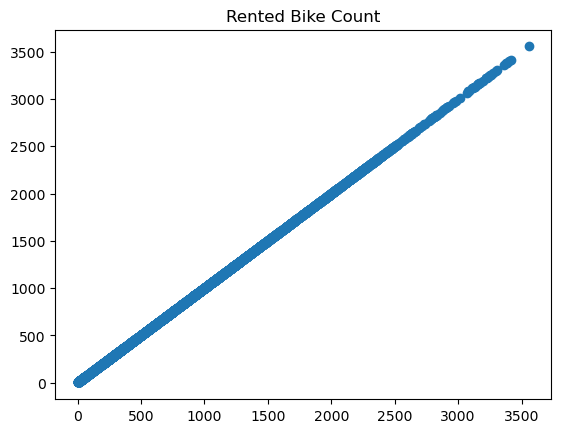

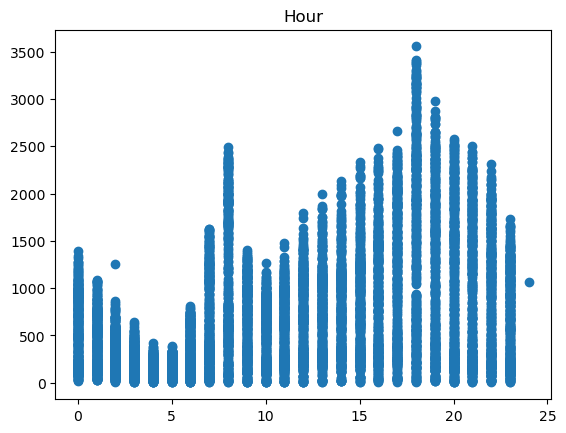

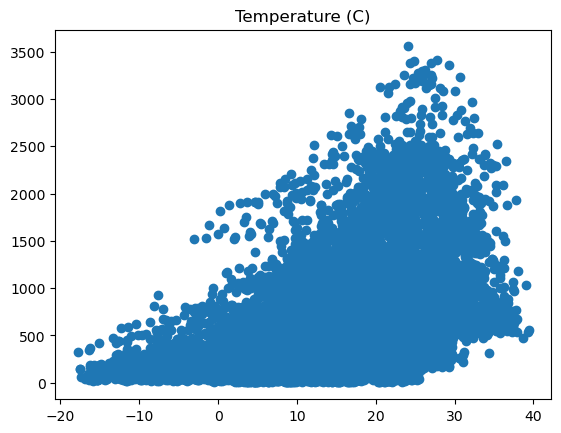

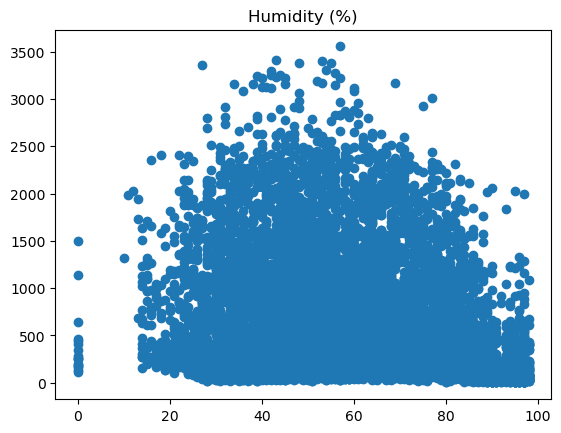

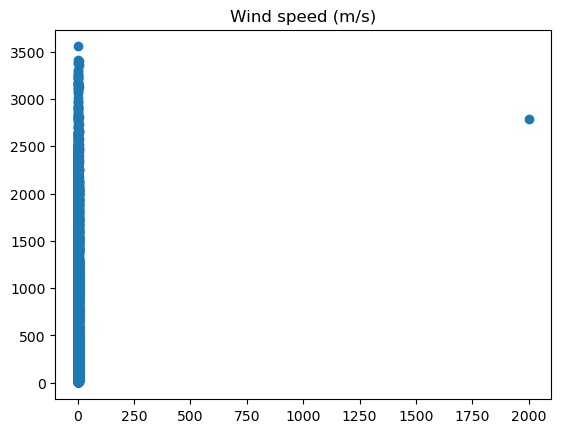

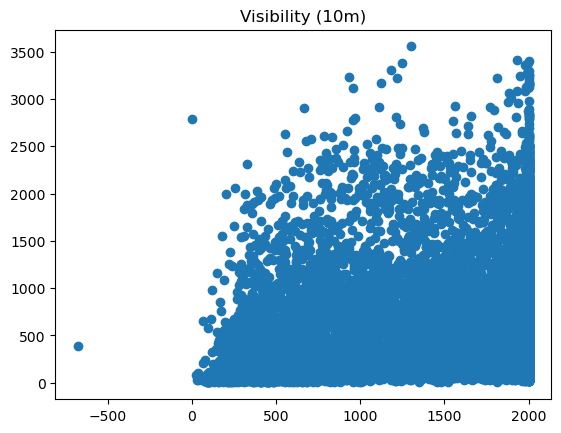

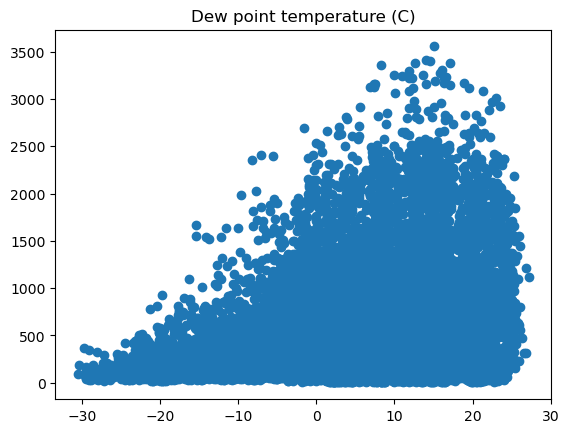

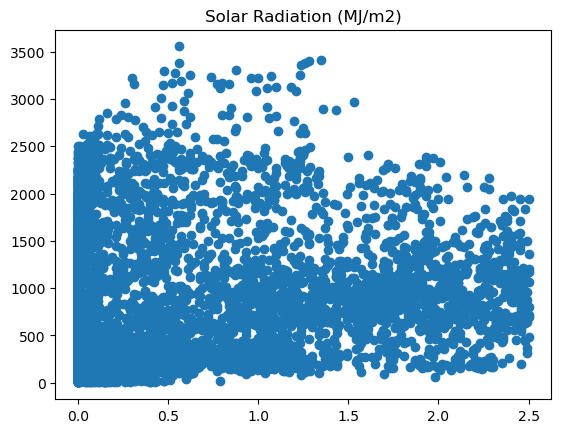

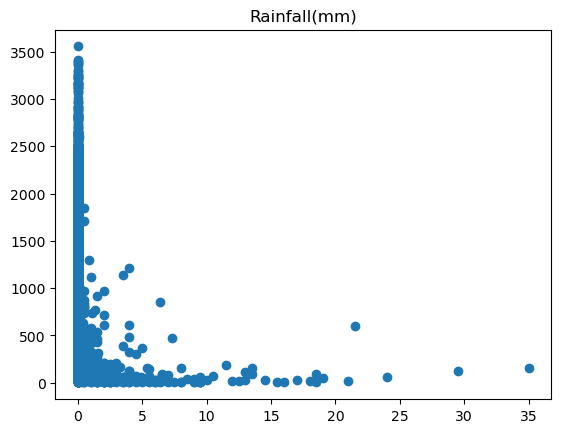

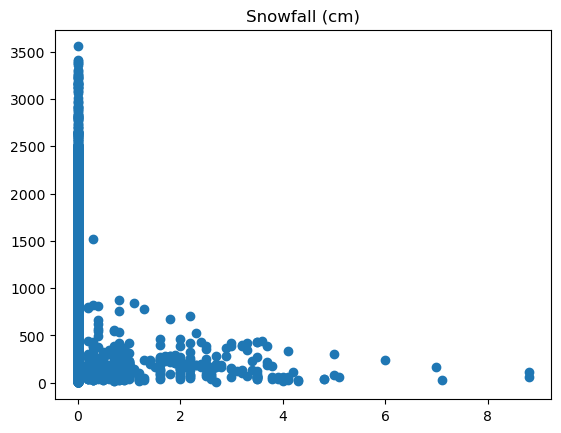

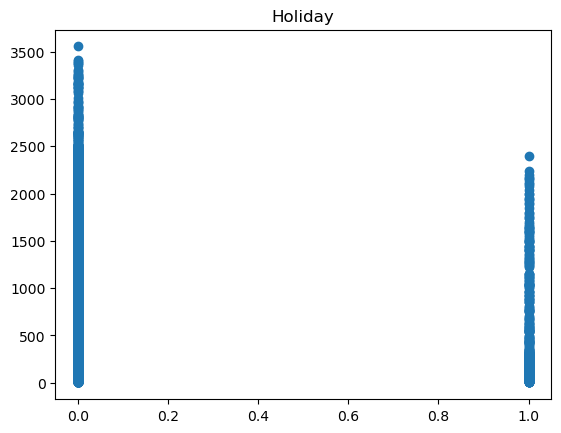

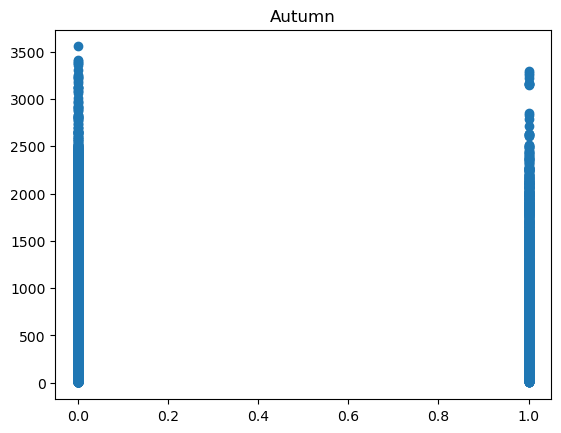

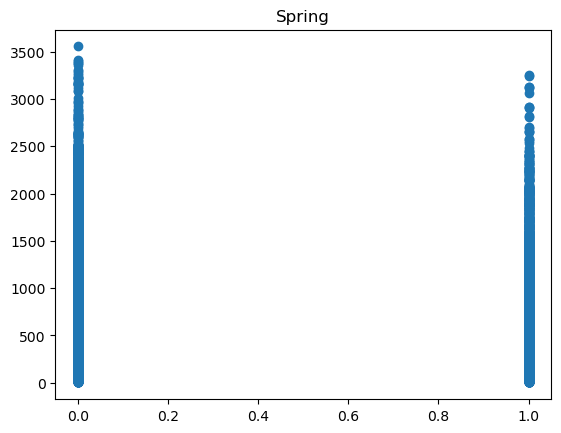

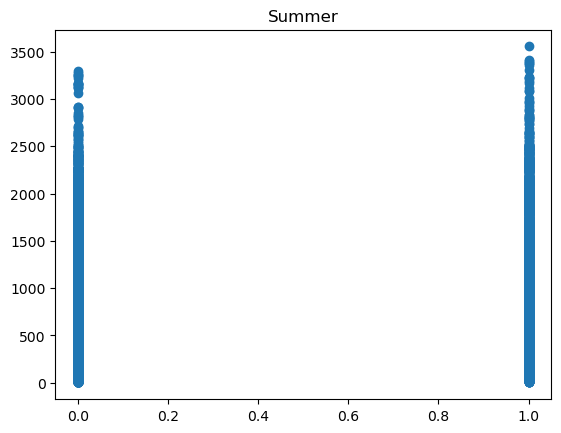

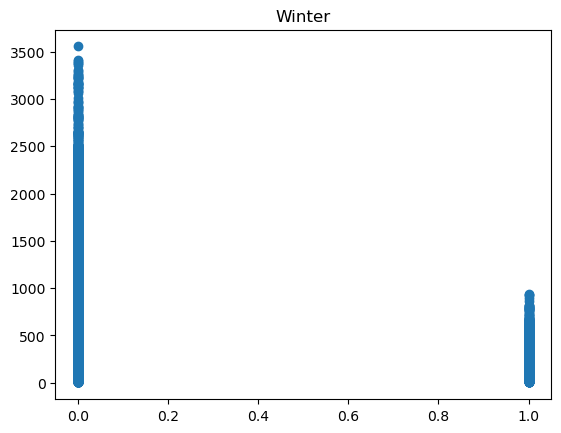

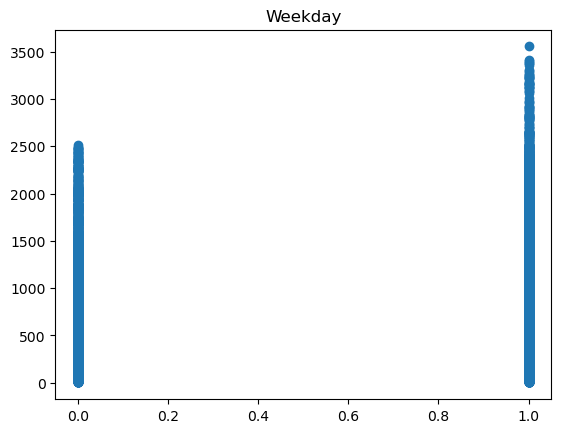

In [10]:
# Plot multiple variables
for col in data.columns:
    plt.scatter(data[col], data['Rented Bike Count'])
    plt.title(col)
    plt.show()

In [15]:
# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix.loc[:, 'Rented Bike Count'])

Rented Bike Count            1.000000
Hour                         0.425460
Temperature (C)              0.562774
Humidity (%)                -0.201755
Wind speed (m/s)             0.040741
Visibility (10m)             0.211029
Dew point temperature (C)    0.400248
Solar Radiation (MJ/m2)      0.256594
Rainfall(mm)                -0.129170
Snowfall (cm)               -0.152261
Holiday                     -0.070070
Autumn                       0.165333
Spring                       0.015580
Summer                       0.282001
Winter                      -0.458920
Weekday                      0.046360
Name: Rented Bike Count, dtype: float64


In [11]:
preprocessed_data = data.copy()

# top_3 should be an array of 3 strings ['attribute name', 'attribute name','attribute name']
top_3 = ['Temperature (C)', 'Hour', 'Winter']
print(top_3)
# The following code is used by the autograder
# make sure your variable that contains a list of the names of the top 3 attributes is assigned to step3_data
step8_data = top_3.copy()

['Temperature (C)', 'Hour', 'Winter']


**STEP9:** Divide the data into training and test sets using an appropriate splitting method such that 20% of the data is kept for testing. Create a pipeline that includes the linear regression model in addition to the pipeline defined in STEP7. Fit the pipeline to the training set and calculate the rmse of the fit to evaluate its performance. As a comparison, compute the rmse that would be obtained by predicting the mean value of bike rentals for all training examples.

_Type your answer here, replacing this text._

In [12]:
# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step9
from sklearn.pipeline import make_pipeline

# pipeline_step7 = Pipeline([('imputer', SimpleImputer(strategy='median'))])
pipeline_step9 = make_pipeline(
    pipeline_step7,
    LinearRegression()
)

# Now we can split our data in y and X
y = data['Rented Bike Count']
X = data.drop('Rented Bike Count', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Fit the pipline to the training data
pipeline_step9.fit(X_train, y_train)

# Predict on the train data
y_pred = pipeline_step9.predict(X_train)
# calculate the RMSE of the fit to the training data
rmse_train = mean_squared_error(y_train, y_pred, squared=False)

# Predict on the mean value
y_mean = np.mean(y_train)
y_pred_mean = np.full_like(y_train, y_mean)
# calculate the RMSE of the baseline model (by predicting the mean value of bike rentals for all training examples)
rmse_baseline = mean_squared_error(y_train, y_pred_mean, squared=False)

print("RMSE for training data:", rmse_train)
print("RMSE for baseline (predicting mean):", rmse_baseline)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step9_data = rmse_train

RMSE for training data: 431.4306298852744
RMSE for baseline (predicting mean): 641.4050137101534


Text(0, 0.5, 'Predicted')

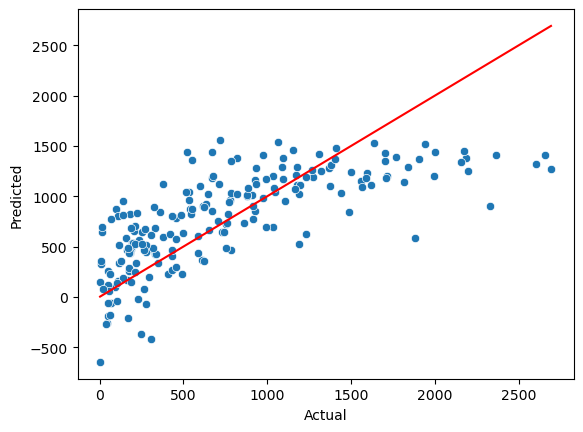

In [18]:
#The following code will show a visualisation of the fit for your linear regression.
# I will use your pipeline_step9 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step9.predict(X_train[:subset_size])

# Then I create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
# A perfect solution would look like the red line
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

**STEP10:**  Fit a Kernel Ridge regression model (imported from sklearn.kernel_ridge) to the X_train data from STEP9. Build a new pipeline that includes the Kernel Ridge regression model in addition to the pipeline defined in STEP7, and fit it to the training data using default settings. Generate a scatter plot of the predicted values against the actual values for the training data, and calculate the RMSE of the fit to the training data.

In [13]:
from sklearn.kernel_ridge import KernelRidge

# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step10
pipeline_step10 = make_pipeline(
    pipeline_step7,
    KernelRidge()
)

# Fit the pipline to the training data
pipeline_step10.fit(X_train, y_train)

# make predictions on the training data
y_pred_train_KR = pipeline_step10.predict(X_train)

# calculate rmse for training data
rmse_train_KR = mean_squared_error(y_train, y_pred_train_KR, squared=False)
print('Kernel Ridge model RMSE on training data:', rmse_train_KR)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step10_data = rmse_train_KR

Kernel Ridge model RMSE on training data: 431.48514220246904


Text(0, 0.5, 'Predicted')

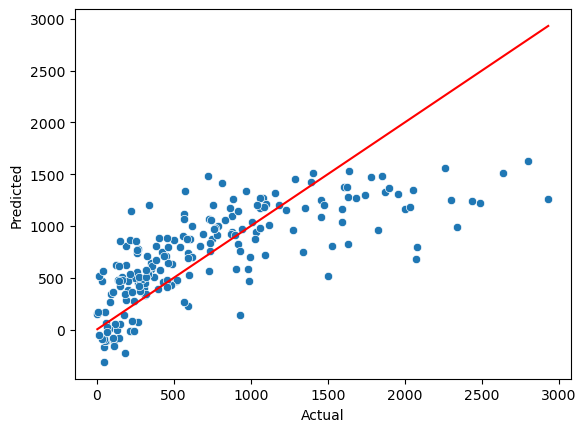

In [14]:
# use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step10.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

**STEP11:** fit a Support Vector Regression (from sklearn.svm import SVR). As you did for STEP10, create a new pipeline using the pipelinr from STEP7 and this model and fit it to your training data, using the default settings. Again, generate a scatter plot of the predicted values against the actual values for the training data, and calculate the RMSE of the fit to the training data.

In [15]:
from sklearn.svm import SVR

# you can use make_pipline to create a new pipiline by adding a model at the end of pipeline_step7 or you can simply create a new pipeline. 
# whatever you end up doing, make sure it is called pipeline_step11
pipeline_step11 = make_pipeline(
    pipeline_step7,
    SVR()
)

# Fit the pipline to the training data
pipeline_step11.fit(X_train, y_train)

# make predictions on the training data
y_pred_train_SVR = pipeline_step11.predict(X_train)

# calculate rmse for training data
rmse_train_SVR = mean_squared_error(y_train, y_pred_train_SVR, squared=False)
print('Support Vector Regression model RMSE on training data:', rmse_train_SVR)


# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step11_data = rmse_train_SVR

Support Vector Regression model RMSE on training data: 649.2643604024629


Text(0, 0.5, 'Predicted')

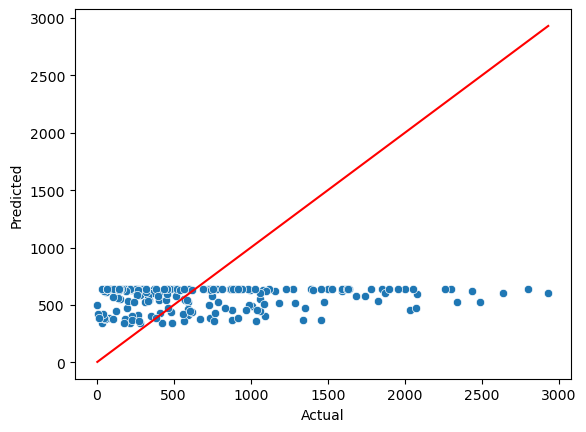

In [16]:
# use your pipeline_step10 to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_step11.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

**STEP12:** Perform a 10 fold cross validation for each of the three model (LinearRegression,KernelRidge,SVR). This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run. Find the mean and standard deviation of the rmse values obtained for each model for the validation splits.

In [18]:
# you might need some or all of the following imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#Linear Regression CV mean and std RMSE from the 10 folds:
rmse_LR = -cross_val_score(pipeline_step9, X_train, y_train, 
                           scoring='neg_root_mean_squared_error', cv=10)
rmse_LR_mean = pd.Series(rmse_LR).mean()
rmse_LR_std  = pd.Series(rmse_LR).std()
print('Linear Regression CV Scores:') 
print(f'Mean: {rmse_LR_mean:.2f}, Std: {rmse_LR_std:.2f}\n')


#Kernel Ridge CV mean and std:
rmse_KR = -cross_val_score(pipeline_step10, X_train, y_train, 
                           scoring='neg_root_mean_squared_error', cv=10)
rmse_KR_mean = pd.Series(rmse_KR).mean()
rmse_KR_std  = pd.Series(rmse_KR).std()
print('Kernel Ridge Regression CV Scores:') 
print(f'Mean: {rmse_KR_mean:.2f}, Std: {rmse_KR_std:.2f}\n')


#SVR CV mean and std:
rmse_SVR = -cross_val_score(pipeline_step11, X_train, y_train, 
                           scoring='neg_root_mean_squared_error', cv=10)
rmse_SVR_mean = pd.Series(rmse_SVR).mean()
rmse_SVR_std  = pd.Series(rmse_SVR).std()
print('Support Vector Regression CV Scores:') 
print(f'Mean: {rmse_SVR_mean:.2f}, Std: {rmse_SVR_std:.2f}\n')


# The following code is used by the autograder
step12_data = [rmse_LR_mean,rmse_KR_mean,rmse_SVR_mean]

Linear Regression CV Scores:
Mean: 441.67, Std: 25.89

Kernel Ridge Regression CV Scores:
Mean: 442.54, Std: 27.95

Support Vector Regression CV Scores:
Mean: 649.63, Std: 30.74



**STEP13:** Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. Use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function GridSearchCV to do this.

For KernelRidge, vary the hyperparameter alpha. (note, if you are using KernelRidge as the last step in a pipeline, alpha is refered to as kernelridge__alpha) 

For SVR, vary the hyperparameter C. (note, if you are using SVR as the last step in a pipeline, C is refered to as SVR__C)

Find the hyperparameter setting for each medel.

Finally, train and apply both models, with the best hyperparameter settings, to the test set and report the performance as rmse.

In [34]:
# from sklearn.model_selection import GridSearchCV

# # Define the GridSearchCV objects for each model
# param_grid_kr = {'kernelridge__alpha' : [0.25, 0.05, 0.75, 0.1]}
# kr_cv = GridSearchCV(pipeline_step10, param_grid_kr, cv=10,
#                      scoring='neg_root_mean_squared_error')
# param_grid_svr = {'svr__C' : [0.1, 1, 10, 100, 1000]}
# svr_cv = GridSearchCV(pipeline_step11, param_grid_svr, cv=10,
#                      scoring='neg_root_mean_squared_error')

# # Fit the GridSearchCV objects to the training data
# kr_cv.fit(X_train, y_train)
# svr_cv.fit(X_train, y_train)

# # Print the best hyperparameter setting for each model
# print("Best hyperparameter setting for Kernel Ridge Regression:", kr_cv.best_params_)
# print("Best hyperparameter setting for Support Vector Regression:", svr_cv.best_params_)

# # Create pipeline using the best hyperparameter
# pipeline_best_kr = make_pipeline(
#     pipeline_step7,
#     KernelRidge(alpha=0.05)
# )
# pipeline_best_svr = make_pipeline(
#     pipeline_step7,
#     SVR(C=1000)
# )

# # Train and apply the chosen model to the test set
# pipeline_best_kr.fit(X_train, y_train)
# kr_predictions = pipeline_best_kr.predict(X_test)
# kr_rmse = mean_squared_error(y_test, kr_predictions, squared=False)

# pipeline_best_svr.fit(X_train, y_train)
# svr_predictions = pipeline_best_svr.predict(X_test)
# svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)

# print("Kernel Ridge Regression RMSE on test set:", kr_rmse)
# print("Support Vector Regression RMSE on test set:", svr_rmse)

# # The following code is used by the autograder
# # make sure your variable that contains that data from this step is the one assigned to step3_data
# step13_data = [kr_rmse , svr_rmse]

Best hyperparameter setting for Kernel Ridge Regression: {'kernelridge__alpha': 0.05}
Best hyperparameter setting for Support Vector Regression: {'svr__C': 1000}
Kernel Ridge Regression RMSE on test set: 452.8635149979419
Support Vector Regression RMSE on test set: 516.9557089877353


Text(0, 0.5, 'Predicted')

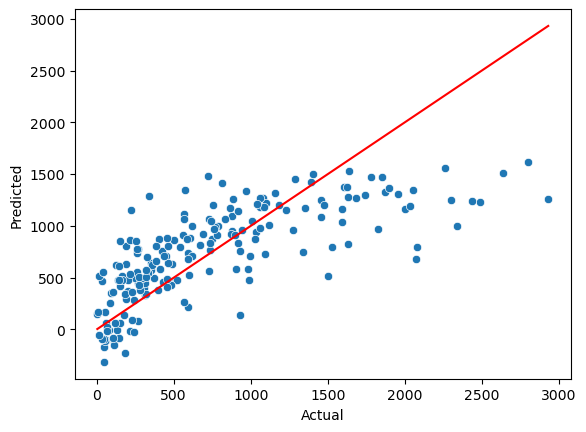

In [36]:
# use your pipeline_best_svr to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_best_kr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')